# Cet exemple a pour objectif de décrire pour chaque décile de revenu la consommation annuelle moyenne de carburants, ainsi que les dépenses moyennes pour la TICPE


In [1]:
import pandas
import seaborn
from pandas import concat

from openfisca_france_indirect_taxation.examples.utils_example import graph_builder_line
from openfisca_france_indirect_taxation.surveys import SurveyScenario

seaborn.set_palette(seaborn.color_palette("Set2", 12))
%matplotlib inline

# Sélection des variables que l'on veut simuler

In [2]:
simulated_variables = [
    'ticpe_totale',
    'diesel_ticpe',
    'essence_ticpe',
    'depenses_carburants',
    'depenses_diesel',
    'depenses_essence'
    ]


# Construction des simulations par décile de revenu

ticpe totale  par decile de revenu


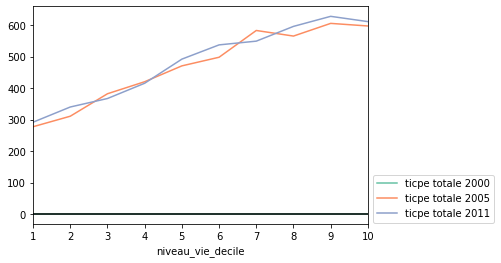

ticpe diesel  par decile de revenu


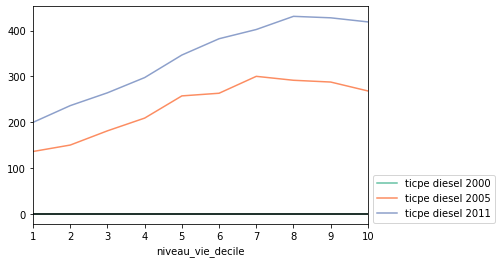

ticpe essence  par decile de revenu


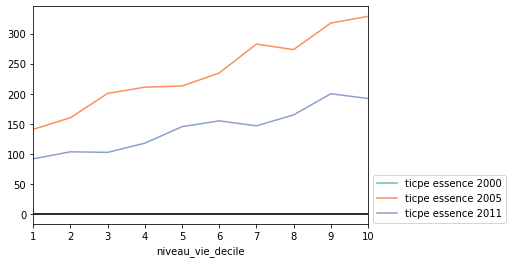

depenses carburants  par decile de revenu


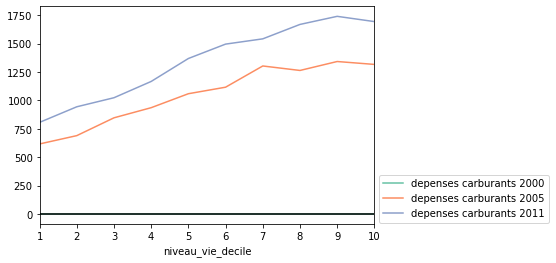

depenses diesel  par decile de revenu


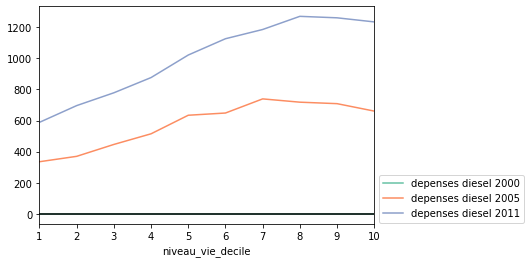

depenses essence  par decile de revenu


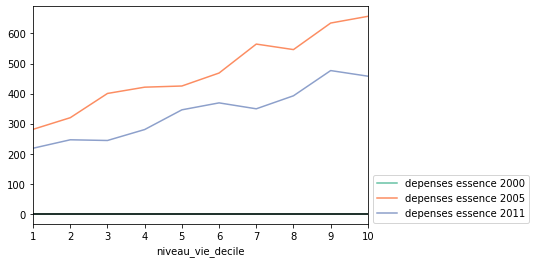

In [5]:
to_graph = ['ticpe totale ', 'ticpe diesel ', 'ticpe essence ', 'depenses carburants ', 'depenses diesel ',
            'depenses essence ']
for element in to_graph:
    depenses = None
    for year in [2000, 2005, 2011]:
        survey_scenario = SurveyScenario.create(year = year)
        pivot_table = pandas.DataFrame()
        for values in simulated_variables:
            pivot_table = pandas.concat([
                pivot_table,
                survey_scenario.compute_pivot_table(
                    values = [values], columns = ['niveau_vie_decile'], period = year)
                ])
        df = pivot_table.T
        df.rename(columns = {'ticpe_totale': 'ticpe totale {}'.format(year),
            'diesel_ticpe': 'ticpe diesel {}'.format(year),
            'essence_ticpe': 'ticpe essence {}'.format(year),
            'depenses_carburants': 'depenses carburants {}'.format(year),
            'depenses_diesel': 'depenses diesel {}'.format(year),
            'depenses_essence': 'depenses essence {}'.format(year)},
            inplace = True)

        if depenses is not None:
            depenses = concat(
                [depenses, df[element + '{}'.format(year)]], axis = 1)
        else:
            depenses = df[element + '{}'.format(year)]
    print('{} par decile de revenu'.format(element))
    graph_builder_line(depenses)
